In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict 

In [2]:
df = pd.read_csv('Insurance data.csv')

In [3]:
df.shape

(1338, 8)

In [4]:
df.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1338 non-null   int64  
 1   age         1338 non-null   int64  
 2   sex         1338 non-null   object 
 3   bmi         1338 non-null   float64
 4   children    1338 non-null   int64  
 5   smoker      1338 non-null   object 
 6   region      1338 non-null   object 
 7   charges     1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [6]:
df.describe()

,Unnamed: 0,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,0.000000,18.000000,15.960000,0.000000,1121.873900
25%,334.250000,27.000000,26.296250,0.000000,4740.287150
50%,668.500000,39.000000,30.400000,1.000000,9382.033000
75%,1002.750000,51.000000,34.693750,2.000000,16639.912515
max,1337.000000,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isna().sum()

Unnamed: 0    0
age           0
sex           0
bmi           0
children      0
smoker        0
region        0
charges       0
dtype: int64

In [8]:
df.duplicated().sum()

0

## Data Exploartion

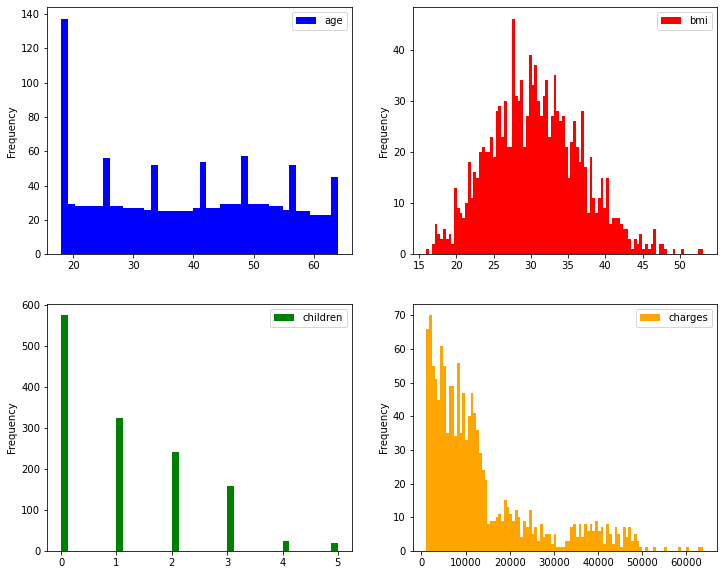

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
df.plot(kind='hist', y='age', bins=40, color='b', ax=axes[0][0])
df.plot(kind='hist', y='bmi', bins=100, color='r', ax=axes[0][1])
df.plot(kind='hist', y='children', bins=40, color='g', ax=axes[1][0])
df.plot(kind='hist', y='charges', bins=100, color='orange', ax=axes[1][1])
plt.show()

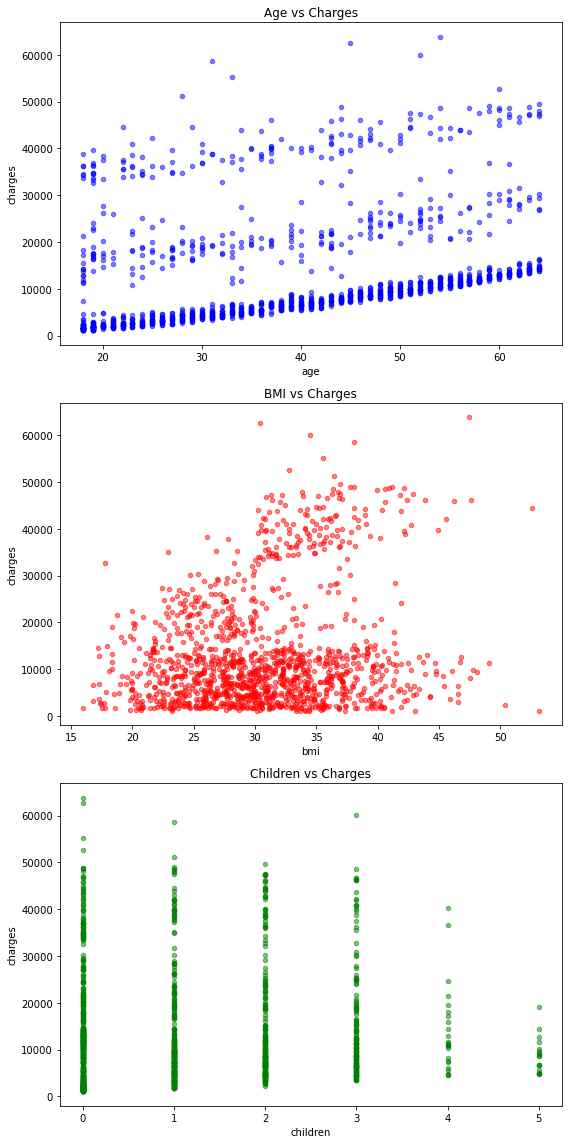

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,16))
df.plot(kind='scatter', x='age', y='charges', alpha=0.5, color='b', ax=axes[0], title='Age vs Charges')
df.plot(kind='scatter', x='bmi', y='charges',alpha=0.5, color='r', ax=axes[1],title='BMI vs Charges')
df.plot(kind='scatter', x='children', y='charges',alpha=0.5, color='g', ax=axes[2], title='Children vs Charges')
plt.tight_layout()  # removes overlapping of figures
plt.show()


<AxesSubplot:xlabel='bmi', ylabel='charges'>

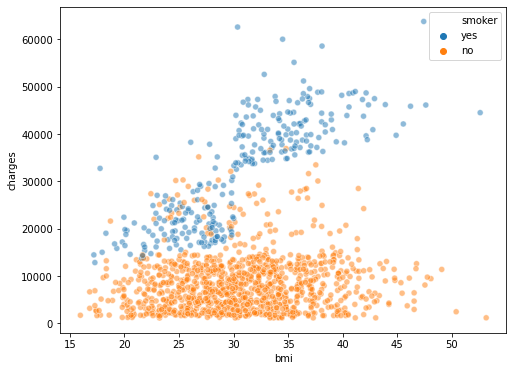

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='bmi', y='charges', data=df, alpha=0.5, hue='smoker')

<AxesSubplot:xlabel='region', ylabel='count'>

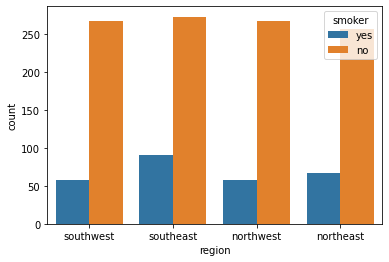

In [12]:
sns.countplot(df['region'], hue=df['smoker'])

<AxesSubplot:xlabel='charges'>

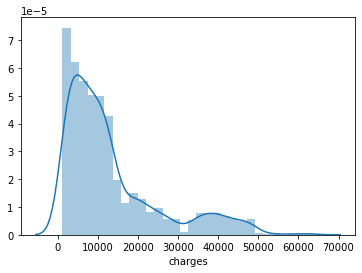

In [13]:
sns.distplot(df['charges'])

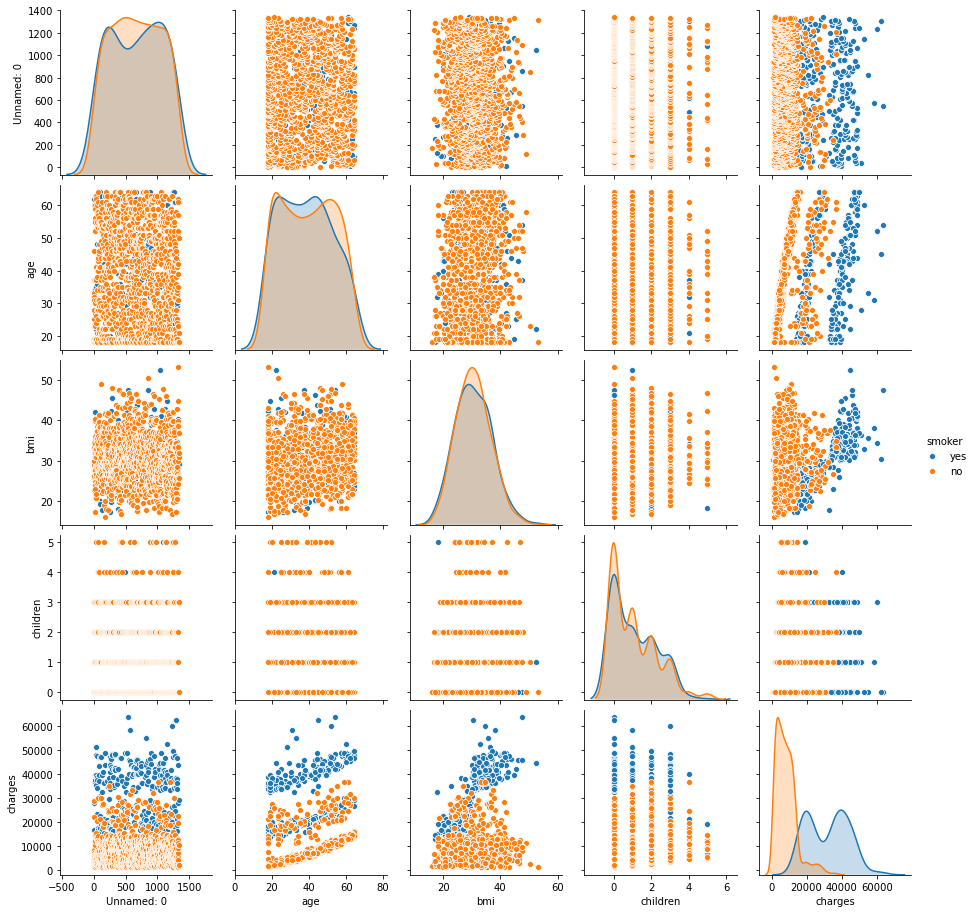

In [14]:
sns.pairplot(df, hue='smoker')

<AxesSubplot:>

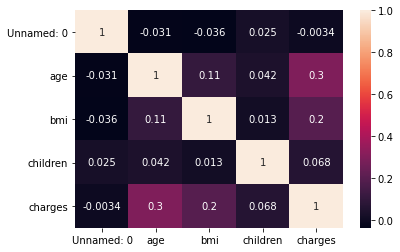

In [15]:
corr = df.corr()
sns.heatmap(corr, annot=True)

## Feature Engg

In [16]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [17]:
gender = pd.get_dummies(df['sex'], prefix='Gender')
smoker = pd.get_dummies(df['smoker'], prefix='Smoker')
region = pd.get_dummies(df['region'], prefix='Region' )

In [18]:
df_final = pd.concat([df,gender,smoker,region], axis=1)

In [19]:
df_final.drop(['sex', 'smoker', 'region'], axis=1, inplace=True)

In [20]:
df_final.head()

,age,bmi,children,charges,Gender_female,Gender_male,Smoker_no,Smoker_yes,Region_northeast,Region_northwest,Region_southeast,Region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


## Train test split

In [21]:
X = df_final.drop(['charges'], axis=1)
y = df_final['charges']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

## Standardization

In [23]:
# First evalute model without standardization 
# if needed then standardization could be provided later to increase accuracy

In [24]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

## Model building

### 1. Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=False)
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

### 2. Polynomial Regression

In [26]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=3)  
x_train_poly = pf.fit_transform(X_train)  
x_test_poly = pf.fit_transform(X_test) 

polynomial_reg = LinearRegression(fit_intercept=False)  
polynomial_reg.fit(x_train_poly, y_train) 

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

### 3. SVM

In [27]:
from sklearn.svm import SVR
svr = SVR(gamma="auto", kernel="linear", C=1000)
svr.fit(X_train, y_train)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### 4. Decisin tree Regressor

In [28]:
from sklearn.tree import DecisionTreeRegressor
dc = DecisionTreeRegressor(max_depth=5, random_state=13)
dc.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=13, splitter='best')

### 5. Random Forest Regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=13, verbose=0, warm_start=False)

## Performance metrics

### 1 Linear Regression

In [30]:
y_test_pred_LR = lr.predict(X_test)
y_train_pred_LR = lr.predict(X_train)

# Check for training accuracy
print("Training Accuracy for Multiple Linear Regression Model: ", r2_score(y_train, y_train_pred_LR))

# Check for test accuracy
print("Test Accuracy for Multiple Linear Regression Model: ", r2_score(y_test, y_test_pred_LR))

# RMSE for training set
print("RMSE for Training Data: ", mean_squared_error(y_train, y_train_pred_LR, squared=False))

# RMSE for test set
print("RMSE for Test Data: ", mean_squared_error(y_test, y_test_pred_LR, squared=False))

# Cross validation check 10-Fold
y_pred_cv_MLR = cross_val_predict(lr, X, y, cv=10)
print("Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model: ", r2_score(y, y_pred_cv_MLR))

Training Accuracy for Multiple Linear Regression Model:  0.747585175485293
Test Accuracy for Multiple Linear Regression Model:  0.7566016163654923
RMSE for Training Data:  6117.142710415642
RMSE for Test Data:  5890.115312927778
Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model:  0.7475855993672423


### 2 Polynomial Regression

In [31]:
y_test_pred_PLR = polynomial_reg.predict(x_test_poly)
y_train_pred_PLR = polynomial_reg.predict(x_train_poly)

# Check for training accuracy
print("Training Accuracy for Multiple Linear Regression Model: ", r2_score(y_train, y_train_pred_PLR))

# Check for test accuracy
print("Test Accuracy for Multiple Linear Regression Model: ", r2_score(y_test, y_test_pred_PLR))

# RMSE for training set
print("RMSE for Training Data: ", mean_squared_error(y_train, y_train_pred_PLR, squared=False))

# RMSE for test set
print("RMSE for Test Data: ", mean_squared_error(y_test, y_test_pred_PLR, squared=False))

# Cross validation check 10-Fold
y_pred_cv_PR = cross_val_predict(polynomial_reg, pf.fit_transform(X), y, cv=10)
print("Accuracy for 10-Fold Cross Predicted Polynomial Linaer Regression Model: ", r2_score(y, y_pred_cv_PR))

Training Accuracy for Multiple Linear Regression Model:  0.8576330809226549
Test Accuracy for Multiple Linear Regression Model:  0.8408291369749223
RMSE for Training Data:  4594.05009943533
RMSE for Test Data:  4763.1771928670305
Accuracy for 10-Fold Cross Predicted Polynomial Linaer Regression Model:  0.8296946863424024


### 3 SVM

In [32]:
y_test_pred_SVR = svr.predict(X_test)
y_train_pred_SVR = svr.predict(X_train)

# Check for training accuracy
print("Training Accuracy for Multiple Linear Regression Model: ", r2_score(y_train, y_train_pred_SVR))

# Check for test accuracy
print("Test Accuracy for Multiple Linear Regression Model: ", r2_score(y_test, y_test_pred_SVR))

# RMSE for training set
print("RMSE for Training Data: ", mean_squared_error(y_train, y_train_pred_SVR, squared=False))

# RMSE for test set
print("RMSE for Test Data: ", mean_squared_error(y_test, y_test_pred_SVR, squared=False))

# Cross validation check 10-Fold
y_pred_cv_SVR = cross_val_predict(svr, X, y, cv=10)
print("Accuracy for 10-Fold Cross Predicted Support Vector Regressor Model: ", r2_score(y, y_pred_cv_SVR))

Training Accuracy for Multiple Linear Regression Model:  0.7089760421761087
Test Accuracy for Multiple Linear Regression Model:  0.7222099930781075
RMSE for Training Data:  6568.338936793798
RMSE for Test Data:  6292.500541467464
Accuracy for 10-Fold Cross Predicted Support Vector Regressor Model:  0.6810559590025496


### 4 Decision Tree Regressor

In [33]:
y_test_pred_DTR = dc.predict(X_test)
y_train_pred_DTR = dc.predict(X_train)

# Check for training accuracy
print("Training Accuracy for Multiple Linear Regression Model: ", r2_score(y_train, y_train_pred_DTR))

# Check for test accuracy
print("Test Accuracy for Multiple Linear Regression Model: ", r2_score(y_test, y_test_pred_DTR))

# RMSE for training set
print("RMSE for Training Data: ", mean_squared_error(y_train, y_train_pred_DTR, squared=False))

# RMSE for test set
print("RMSE for Test Data: ", mean_squared_error(y_test, y_test_pred_DTR, squared=False))

# Cross validation check 10-Fold
y_pred_cv_DTR = cross_val_predict(dc, X, y, cv=10)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regressor Model: ", r2_score(y, y_pred_cv_DTR))

Training Accuracy for Multiple Linear Regression Model:  0.8826073013308283
Test Accuracy for Multiple Linear Regression Model:  0.846283220166794
RMSE for Training Data:  4171.687104130941
RMSE for Test Data:  4680.8593457021
Accuracy for 10-Fold Cross Predicted Decision Tree Regressor Model:  0.8476737887359722


### 5 Random Forest Regressor

In [34]:
y_test_pred_RFR = rf.predict(X_test)
y_train_pred_RFR = rf.predict(X_train)

# Check for training accuracy
print("Training Accuracy for Multiple Linear Regression Model: ", r2_score(y_train, y_train_pred_RFR))

# Check for test accuracy
print("Test Accuracy for Multiple Linear Regression Model: ", r2_score(y_test, y_test_pred_RFR))

# RMSE for training set
print("RMSE for Training Data: ", mean_squared_error(y_train, y_train_pred_RFR, squared=False))

# RMSE for test set
print("RMSE for Test Data: ", mean_squared_error(y_test, y_test_pred_RFR, squared=False))

# Cross validation check 10-Fold
y_pred_cv_SVR = cross_val_predict(rf, X, y, cv=10)
print("Accuracy for 10-Fold Cross Predicted Random Forest Regressor Model: ", r2_score(y, y_pred_cv_SVR))

Training Accuracy for Multiple Linear Regression Model:  0.8933315490033255
Test Accuracy for Multiple Linear Regression Model:  0.8619010423028225
RMSE for Training Data:  3976.5750001551028
RMSE for Test Data:  4436.700909309947
Accuracy for 10-Fold Cross Predicted Random Forest Regressor Model:  0.8591160990365871


## Conclusion

After detail evaluation of all the selected models it can be concluded that,

<b> Random Forest Regressor </b> provides best accuracy i.e. R2 Score and RMSE value among all models